# <center>PREDICTING EFFICIENT FERTILIZER RECOMMENDATION BASED ON SOIL FEATURES AND ENVIRONMENTAL PARAMETERS USING MACHINE LEARNING MODELS
### <center>Submitted by 
<center>Project Group 1

    
#### <center>Group Members:  
<center>Mohammad Monirul Hasan Tipu  
<center>Dr. Mohammad Asaduzzaman 
<center>Ummy Kulsum Mukta  
<center>Md. Ariful Islam  
<br>
<br> 
<br>
<center>Course of Geospatial Data Analysis & Spatiotemporal Machine Learning with Python  
<center>Tailor Made Training (TMT) - Bangladesh  
<br>
<br>
<center>ASICT, BARI, Gazipur, Bangladesh  
<center>ITC, University of Twente, Netherlands

## <center>Introduction 

Bangladesh has a large agricultural sector supporting majority of the population for their livelihood. Every year huge resources in terms of land and fertilizer are used for production of food. Most of the fertilizers being used in farms today are being wasted due to the incorrect use of type of fertilizer. Farmers do not have enough of knowledge about soil nutrients contents such as nitrogen, phosphorous and potassium in the land. However, the balanced dose of fertilizer used for different crop is very important for obtaining desirable yield which depends on several edaphic and environmental factors. In addition, the elemental composition especially nitrogen, phosphorus and potassium content of a fertilizer needs to be considered in selecting a source fertilizer as these elements play a vital role in plant growth and development. In this regard, a fertilizer requirement prediction model would be very useful for obtaining higher yield of different crops in Bangladesh. 

In this present project, we used the standard machine learning models that analyze various soil features like N, P, K, soil pH, and environmental parameters such as temperature, relative humidity, and annual rainfall of particular land area to recommend the type of fertilizer to be used for the selected crops. Therefore, the present project has been proposed to analyze available datasets and to predict fertilizer requirements for two different crops based on soil features and environmental parameters using appropriate machine learning models.

### Dataset 

The data used in this project is made by augmenting and combining various publicly available datasets like weather, soil, etc. You can access the dataset [here](https://github.com/tipubari2013/Fertilizer_Prediction_ML/blob/main/Fertilizer_Prediction.csv 'Fetilizer_Prediction.csv').

This data is relatively simple with very few but useful features unlike the complicated features affecting the requirement of fertilizer of the crop.

The data have Nitrogen, Phosphorous, Potassium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop.

**The description of the variables used in this dataset**.

**Feature variables**:
- **Temperature**: Temperature in °C
- **Humidity**: Relative humidity in %
- **Rainfall**: Annual rainfall as in mm
- **pH**: Soil pH 
- **N**: Available Nitrogen at soil
- **P**: Available Phosphorus at soil
- **K**: Available Potassium at soil
- **Soil**: 1. Clayey, 2. Laterite, 3. Silty clay, 4. Sandy, 5. Coastal, 6. Clay loam, 7. Alluvial
- **Crop**: 1. Rice and 2. Coconut

**Target Variable**:
- **Fertilizer**
 <br>**1.DAP and MOP**: Source of P and K 
 <br>**2.Good NPK**: NPK are sufficient in soil. No need to apply any fertilizer.
 <br>**3.MOP**: Source of K
 <br>**4.Urea and DAP**: Source of N and P
 <br>**5.Urea and MOP**: Source of N and K
 <br>**6.Urea**: Source of N only
 <br>**7.DAP**: Source of P only
 <br> 
 <br> DAP= Diammonium phosphate, MOP= Muriate of Potash


## <center>Method

In this project we are dealing with a classification problem. Therefore we have fitted our dataset into few popular machine learning models such as K-Nearest Neighbors, Decision Tree, Random Forest and Gradient Boosting to predict fertilizer recommendation for rice and coconut. Finally, we will select one or two models based on their accuracy and precision.


**The present study deals with the following steps were followed to achieve the goal of this project.**. 

i) **Exploratory Data Analysis** 
- Reading the data as Pandas DataFrame
- Checking the data types and looking for missing values
- Checking the basic statistics of the variables
- Exploring the data using Barplots, Histogram, Boxplot, and Association heatmap.

ii) **Data preprocessing**
- Create feature set and target 
- Data transformation
- Spliting  dataset into train and test

iii) **Fitting dataset into model** 
- K-Nearest Neighbors
- Decision Tree
- Random Forest 
- Gradient Boosting

iv) **Performance evaluation**
- Accuracy score
- Recall
- Precision
- F1-score

##### Now without further ado, Let's dive in and code ...

### i) Exploratory data analysis
For better understanding dataset and their relationship we will use some statistical and visualization function.

In [1]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd # to read and manipulating data 
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#### Reading the data as Pandas DataFrame

In [2]:
#Load dataset to start EDA
#Changing working directory
os.chdir(r'C:\Users\asUs\Downloads')gfbqn d

# To read 'csv' file with panda library
df = pd.read_csv('Fertilizer Prediction.csv')

After reading the dataset, we use head() function to display the dataset and columns function for column name.

In [3]:
# To display the first 10 rows of dataset
display(df.head(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
5,20.82,84.13,230.22,6.46,2.5,4.0,3.0,clay loam,rice,Urea
6,25.95,93.41,172.05,5.84,2.5,4.0,2.0,alluvial,Coconut,Urea and MOP
7,26.49,80.16,242.86,6.98,4.2,2.3,3.2,Clayey,rice,DAP
8,25.01,95.59,165.81,6.00,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
9,21.87,80.19,224.56,5.95,2.9,3.5,3.9,silty clay,rice,Urea


In [4]:
# To find Column name
df.columns

Index(['Temperature', 'Humidity', 'Rainfall', 'pH', 'N', 'P', 'K', 'Soil',
       'Crop', 'Fertilizer'],
      dtype='object')

#### Checking the data types and looking for missing values

In next step we gather some information about different rows and columns in Dataset. We used df.shape and df.info() which gives information about the number of rows, columns, column data types, memory usage, etc. Then isnull() function was used which find out whether there are missing values present or not.

In [5]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


None

**Observations**: <br>
Number of rows = **200** <br>
Number of columns = **10** (**9** feature variables and **1** target variable) <br>
Number of categorical(object) variables = **3**: Soil, Crop, Fertilizer (target variable) <br>
Number of numerical variables = **7**: Temparature, Humidity, Rainfall, pH, N, P, K <br>

In [6]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
pH             0
N              0
P              0
K              0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

**NOTE**: There is no missing values present in this dataset

#### Checking the basic statistics of the variables

Here we used describe() function to get the desciptive statistics of the datset.

In [7]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature,200.0,25.55720,2.544626,20.05,23.8200,25.975,27.310,29.87
Humidity,200.0,88.56315,6.636224,80.12,82.2250,87.495,94.930,99.98
Rainfall,200.0,206.07385,43.954794,131.09,172.3725,203.435,233.115,298.56
pH,200.0,6.21130,0.622228,5.01,5.7600,6.125,6.440,7.87
N,200.0,3.11550,0.910193,2.00,2.2000,2.500,4.000,4.20
P,200.0,3.13050,0.929213,2.00,2.0750,3.900,4.000,4.00
K,200.0,2.95600,0.721364,1.90,2.1000,3.000,3.500,4.00


  **NOTE**:
- It is observed that the mean and median values of the dataset are similar and thus a symmetrical distribution of the dataset is expected. 
- The dataset may contain no extreme outliners. For futher confirmation we will visualize dataset with boxplot.

In [8]:
# statistics of the category variables
display(df.describe(include='object'))

,Soil,Crop,Fertilizer
count,200,200,200
unique,7,2,7
top,silty clay,Coconut,Urea and MOP
freq,42,100,42


**NOTE**:
- silty clay soil showed the highest frequency of 42 out of 200 observations 
- rice and coconut shared their frequency by 50%, equally
- Urea and MOP fertilizer showed the highest frequency of 42 out of 200 observations

Now, we import matplotlib and seborn library for data visualization. 

#### Importing libraries  for data visualization

In [9]:
import matplotlib.pyplot as plt # to visualize graph
%matplotlib inline 
import seaborn as sns # for better visualization of graph with the help of Matplotlib
#%pip install dython 
from dython import nominal # to find out correlation and visualize it

**Explore the Target variable: Fertilizer**

In [10]:
# print the unique class of the Fertilizer 
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP']


<AxesSubplot:xlabel='count', ylabel='Fertilizer'>

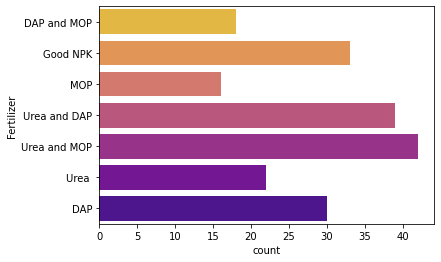

In [11]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

**NOTE**: A very important plot to visualize the diagonal distribution between two features for all the combinations. It is great to visualize how classes differ from each other in a particular space. Based on the plot shown above, Urea and MOP class is common ones needed for Rice and Coconut, and Need of only 'MOP' is rare one (frequency are lowest).

#### Explore the continuous and categorical feature variables

In [12]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

#### Univariate Analysis 

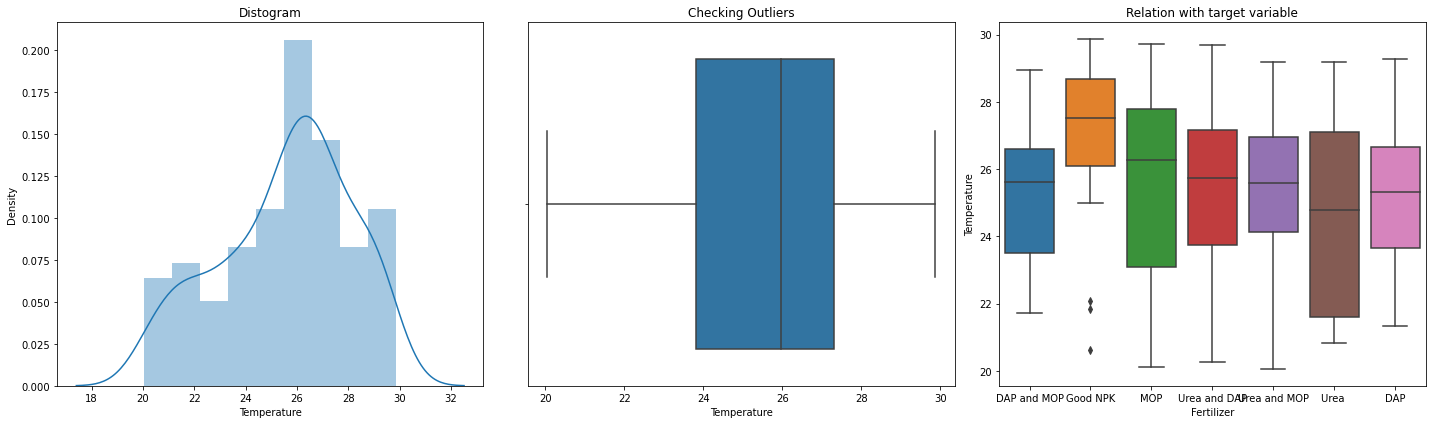

In [13]:
# EDA - Temparature variable
plot_conti(df['Temperature'])

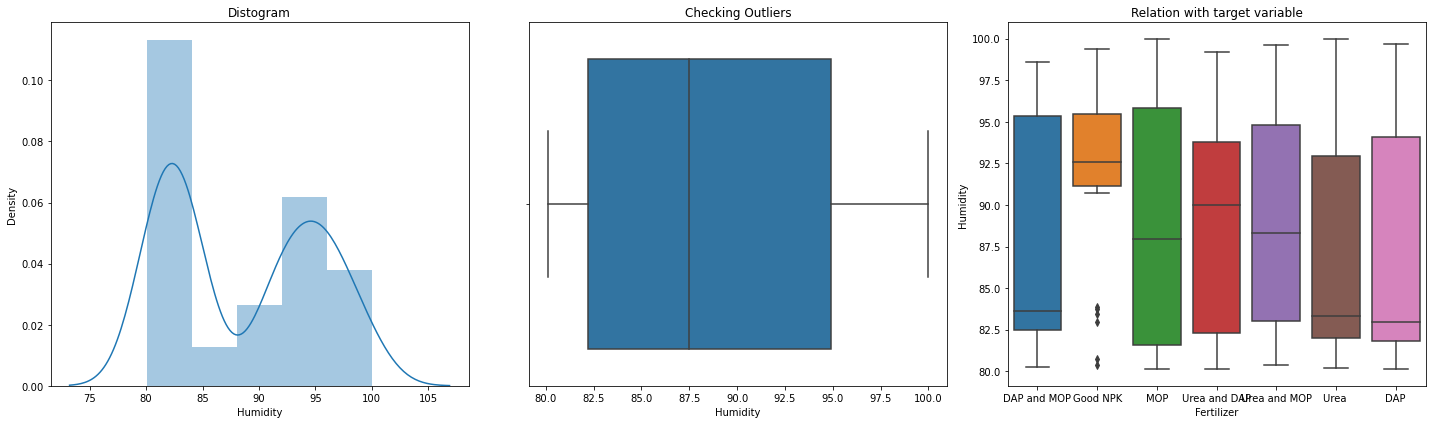

In [14]:
#EDA - Humidity variable
plot_conti(df['Humidity'])

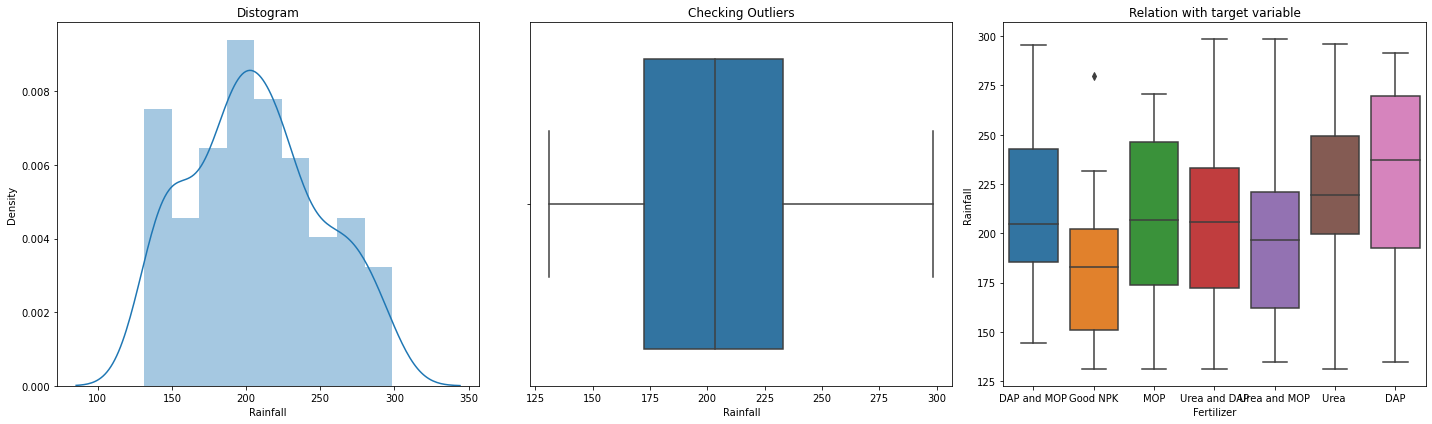

In [15]:
#EDA - Rainfall variable
plot_conti(df['Rainfall'])

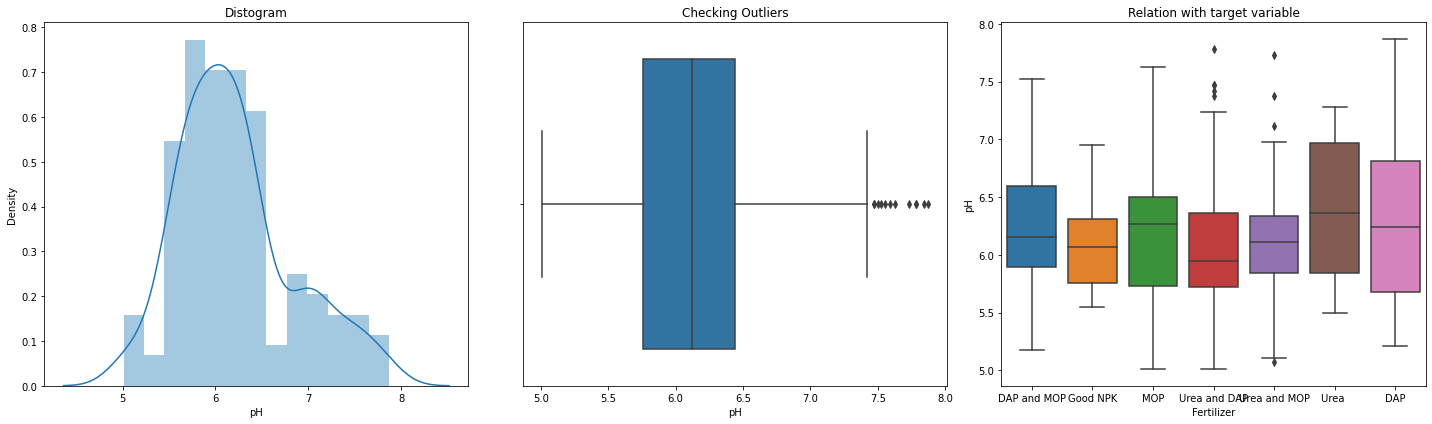

In [16]:
# EDA - pH variable
plot_conti(df['pH'])

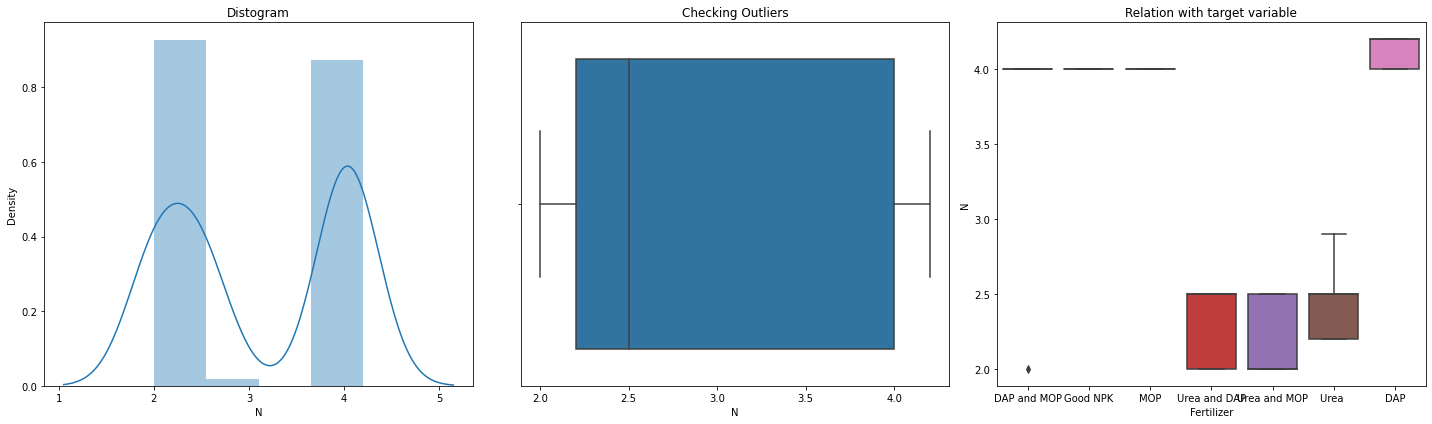

In [17]:
#EDA - Nitrogen variable
plot_conti(df['N'])

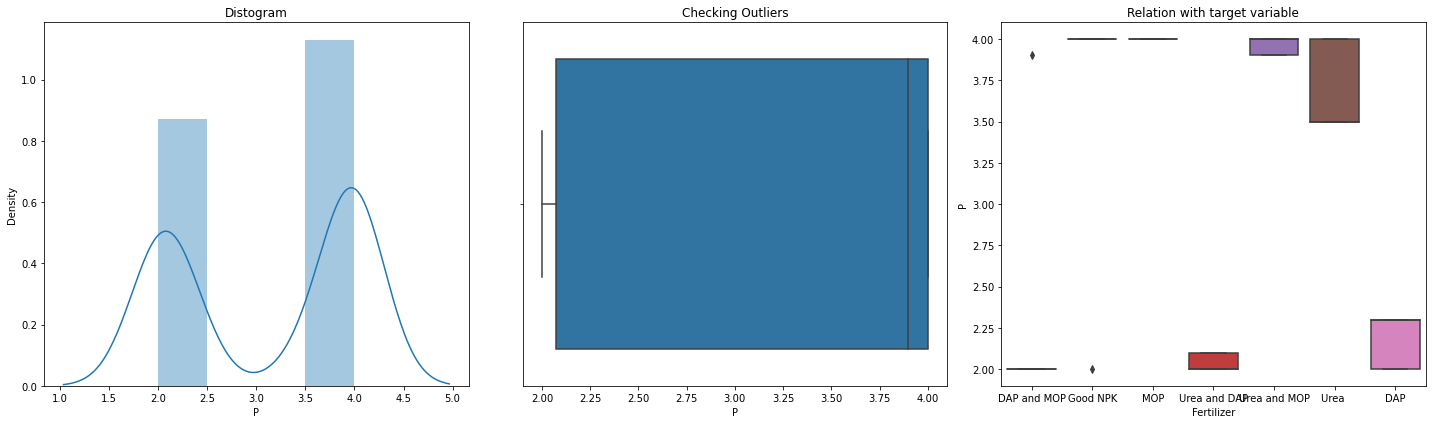

In [18]:
#EDA - Phosphorus variable
plot_conti(df['P'])

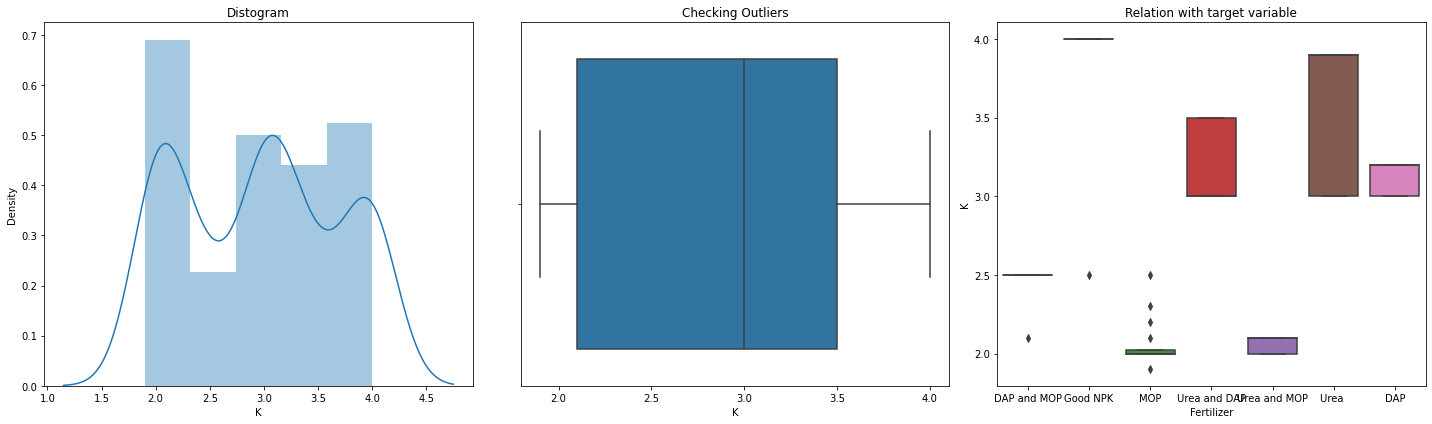

In [19]:
#EDA - Potassium variable
plot_conti(df['K'])

**Note:** 
From the above distoplot and boxplot, it's clear that the given features are either negetively or positively skewed. In pH there are some outliners present. So, we need to perform data transformation before applying K-NN model but for ensemble model, it is not mandatory.

In [20]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [21]:
# print the unique types of the Soil
print("Soil : ", df['Soil'].unique())

Soil :  ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']


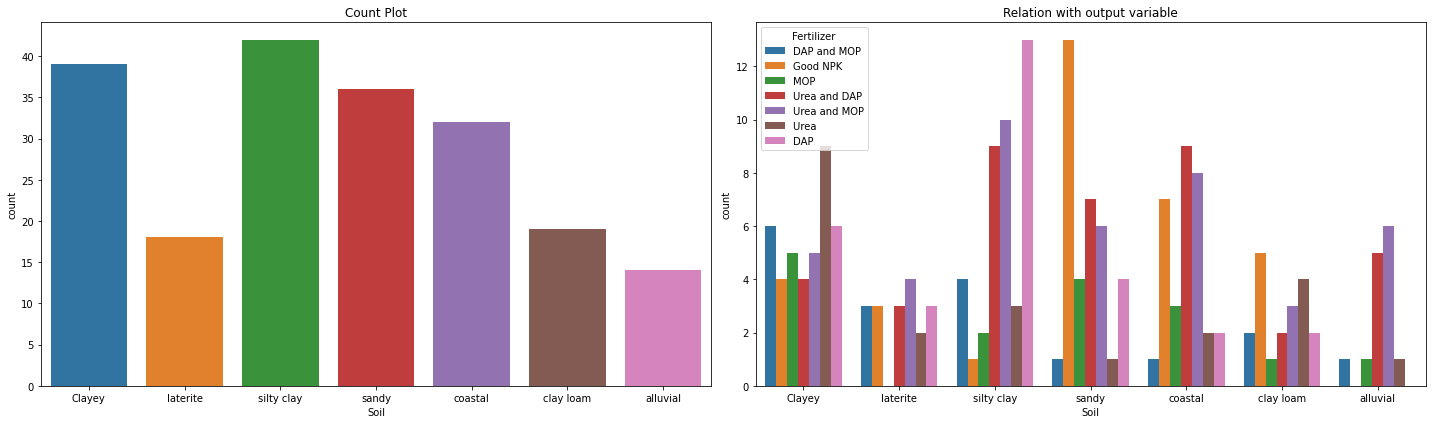

In [22]:
#EDA - Soil_variable
plot_cato(df['Soil'])

**NOTE**: Silty clay and Clayey soil type are most frequent in this dataset. There is no linear relationship between fertilizer and soil. We can guess different types of soil need different type of fertilizer on the basis of their nutrient dificiency. 

In [23]:
# print the unique types of the Crop
print("Crop: ", df['Crop'].unique())

Crop:  ['rice' 'Coconut']


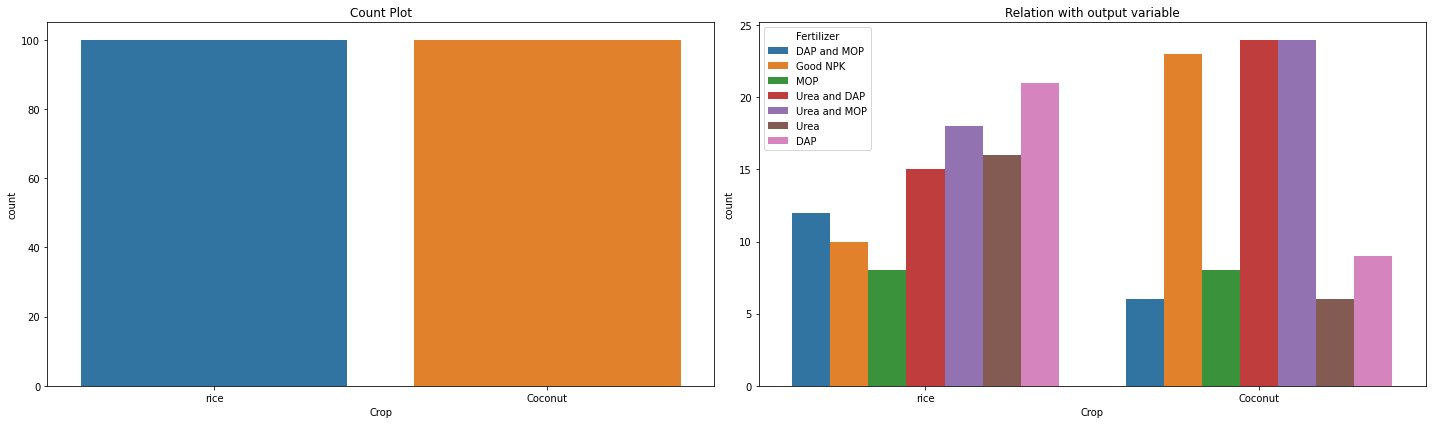

In [24]:
#EDA - Crop_ variable
plot_cato(df['Crop'])

**NOTE**:Rice and Coconut both crop are equally distributed in our dataset. For Coconut cultivation, Urea and DAP and Urea and MOP fertilizer are most common.

#### Bi-Variate Analysis

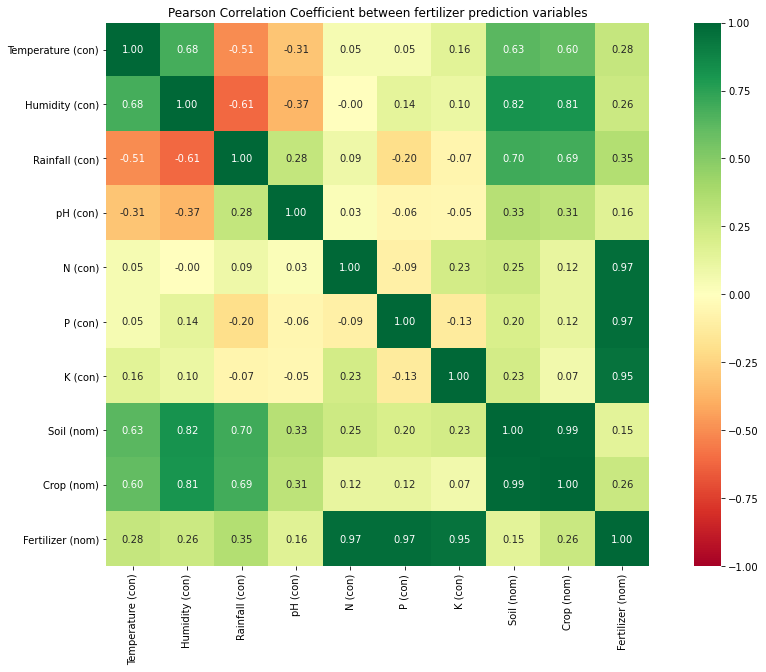

{'corr':                    Temperature (con)  Humidity (con)  Rainfall (con)  \
 Temperature (con)           1.000000        0.683385       -0.505754   
 Humidity (con)              0.683385        1.000000       -0.614205   
 Rainfall (con)             -0.505754       -0.614205        1.000000   
 pH (con)                   -0.305519       -0.365192        0.282530   
 N (con)                     0.052297       -0.002303        0.086501   
 P (con)                     0.052717        0.136661       -0.200266   
 K (con)                     0.155975        0.104165       -0.070109   
 Soil (nom)                  0.628264        0.816603        0.700433   
 Crop (nom)                  0.603367        0.807215        0.689128   
 Fertilizer (nom)            0.276094        0.255053        0.350946   
 
                    pH (con)   N (con)   P (con)   K (con)  Soil (nom)  \
 Temperature (con) -0.305519  0.052297  0.052717  0.155975    0.628264   
 Humidity (con)    -0.365192 -0.002303 

In [25]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(16,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

**NOTE**: Here we have used Person's correlation coeffecient which also measures the strength between the association of 2 varaiables and visualize with a heatmap to generate 2-dimensional representation of information using colors. 
##### Positive Correlation
- Fertilizer: Amount of N, P, K available in soil, Temperature, Humidity, Rainfall, pH, Crop and Soil types.
- Crop: Soil type, pH, Temperature, Humidity, Rainfall of an area.
- Soil: Temperature, Humidity, Rainfall, pH.

##### Negetive Correlation
- Temperature and Humidity both have negetive correlation with Rainfall, soil pH.
- Rainfall and pH both have negative correlation with P and K.
- P has negative correlation with N and K.

### ii) Data Pre-processing

#### Importing libraries for data pre-processing

In [31]:
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
from sklearn.model_selection import train_test_split # to split data into training and testing sets

#### Create feature set and target 

In [32]:
X = df.drop(['Fertilizer'], axis=1) #feature variables
y = df[['Fertilizer']] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

The shape of feature set, X is  (200, 9)
The shape of target, y is  (200, 1)


#### Data transformation

In [33]:
#Label Encoding 
le = LabelEncoder()
df['Fertilizer']= le.fit_transform(df['Fertilizer'])
df['Soil']= le.fit_transform(df['Soil'])
df['Crop']= le.fit_transform(df['Crop'])

In [34]:
display(df.head())

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0,1,1
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,4,0,2
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,6,1,3
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,5,0,5
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,3,0,6


**NOTE**: Machine learning algorithms only understand the number not text, that's the reason we convert our categorical variable to numeric variable. LabelEncoder() function convert unique values of an object variables between 0 to n-1.

In [35]:
# normalize the feature(X) columns 
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop
117,0.547862,0.142497,0.383770,0.262238,0.909091,1.00,1.000000,1.000000,1.0
43,0.849287,0.960222,0.349794,0.192308,0.000000,0.05,0.761905,0.833333,0.0
45,0.500000,0.219537,0.393324,0.069930,1.000000,0.15,0.619048,0.500000,0.0
154,0.346232,0.235146,0.912641,0.423077,0.227273,1.00,0.047619,1.000000,1.0
129,0.687373,0.102216,0.371768,0.328671,0.227273,0.00,0.523810,0.833333,0.0
163,0.058045,0.183787,0.886487,0.671329,0.909091,1.00,1.000000,0.000000,1.0
173,0.349287,0.060926,0.555144,0.828671,0.000000,0.05,0.761905,1.000000,1.0
160,0.651731,0.915408,0.538246,0.349650,0.909091,1.00,1.000000,0.500000,0.0
111,0.129328,0.145015,0.365618,0.793706,0.227273,1.00,0.523810,0.000000,1.0
166,0.772912,0.773917,0.444617,0.297203,0.909091,1.00,1.000000,0.833333,0.0


**NOTE**: We have imported MinMax scaler from scikit-learn machine learning library to convert feature variables in between 0 to 1. Scaling the data for normalization is important for KNN as bringing all the features to the same scale is recommended for applying distance-based algorithms.

#### Spliting dataset into train and test

In [36]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (140, 9)
Shape of X_test is (60, 9)
Shape of y_train is (140, 1)
Shape of y_test is (60, 1)


**NOTE**: We have splitted the dataset 70% for training and 30% for test dataset. 

### iii) Fitting dataset into model

In [37]:
# Importing libraries for classification and performance evaluation
from sklearn.neighbors import KNeighborsClassifier #to build KNeighbors model
from sklearn.ensemble import GradientBoostingClassifier #to build GradientBoosting model
from sklearn.ensemble import RandomForestClassifier #to build RandomForest model
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import GridSearchCV # to best select hyperparameter

from sklearn.metrics import accuracy_score, classification_report # to calcutate accuracy of model
from sklearn.metrics import classification_report #to calculte precision, recall, f1-score
from sklearn.metrics import plot_confusion_matrix # to draw confusion_matrix

#### Classification model: K-Nearnest Neighbors

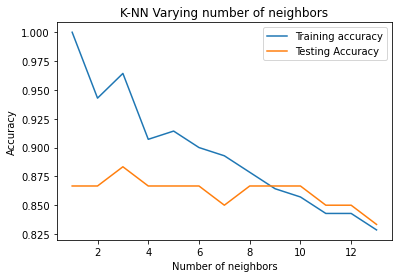

In [38]:
# To determine the k value with highest accuracy  
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**NOTE**: Firstly, we define a function to find out the accuracies with different values of k and it can be seen that with 3 nearest neighbors,,the highest testing accuracy is being shown. 
Now, create model for our dataset with K-Nearest Neighbors algorithm by passing argument number of neighbors(k=3) in KNeighborsClassifier() function.Then, fit our model on the train set using fit() and perform prediction on the test set using predict().

In [39]:
# Create K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_knn = model_knn.fit(X_train, y_train)

In [40]:
#Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.8833333333333333


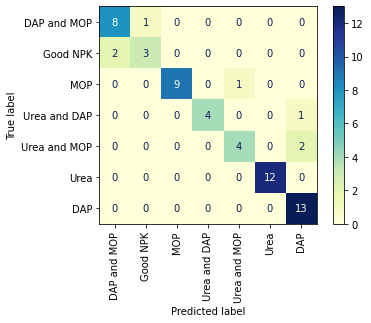

In [68]:
## To visualize confusion matrix
plot_confusion_matrix(model_knn, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [43]:
#Classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.75      0.60      0.67         5
           2       1.00      0.90      0.95        10
           3       1.00      0.80      0.89         5
           4       0.80      0.67      0.73         6
           5       1.00      1.00      1.00        12
           6       0.81      1.00      0.90        13

    accuracy                           0.88        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.89      0.88      0.88        60



**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 

The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is 88%. From classification report we found that there were 89% pressision, 88% recall, and 88% f1-score.    

#### Classification model: DecisionTree 

In [44]:
#Decision Tree model
#random state (int): Controls the randomness of the estimator for reproducibility
model_DT = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
model_DT = model_DT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)

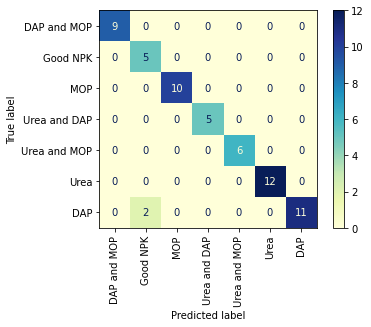

In [71]:
# To visualize confusion matrix
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [46]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))
#Classification report
print(classification_report(y_test, y_pred_DT))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually.

The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 97%. From classification report we found that there were 98% pressision, 97% recall, and 97% f1-score. 

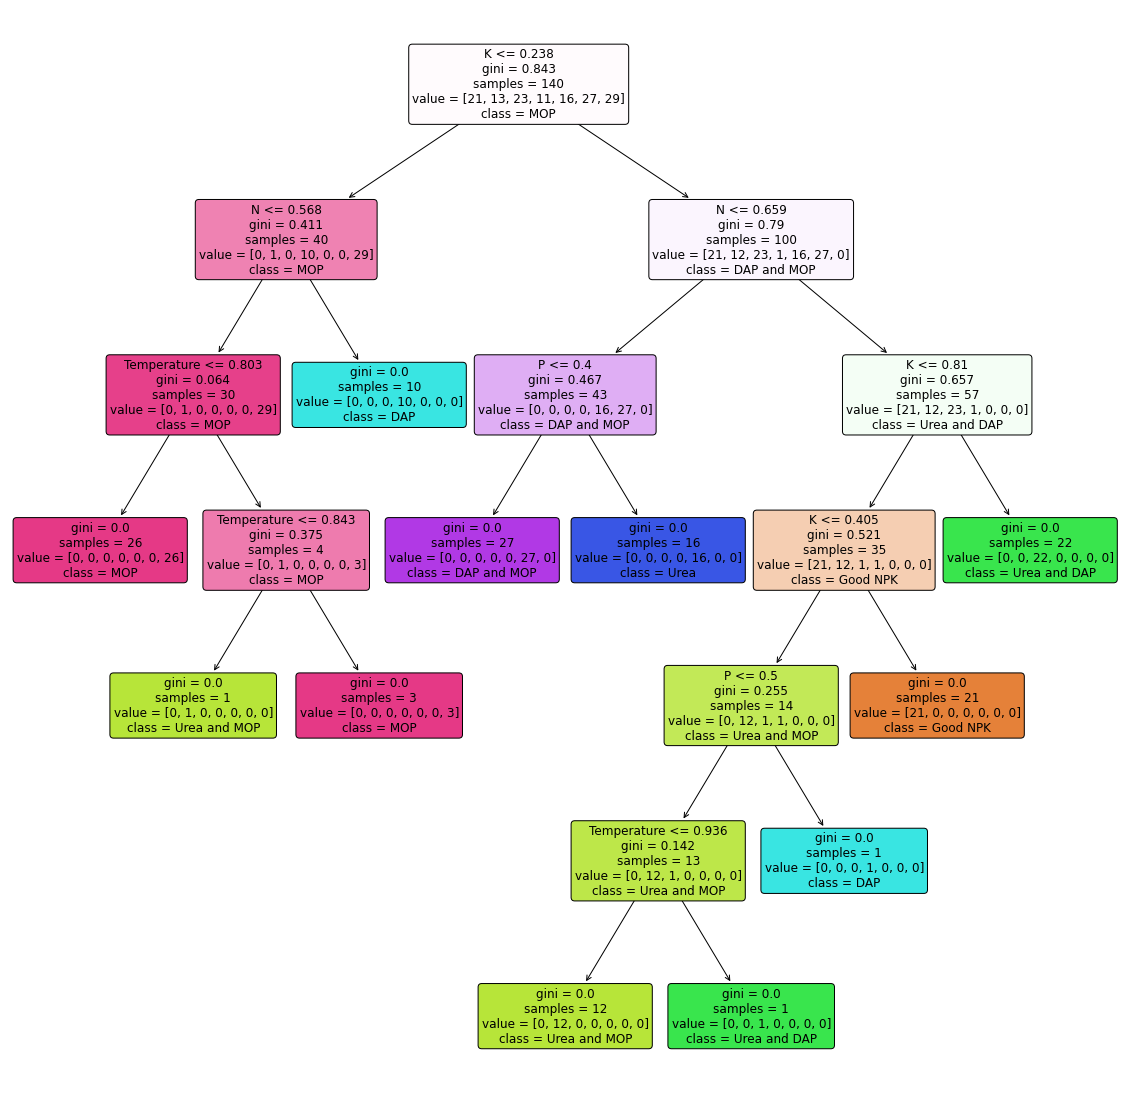

In [47]:
# Visualizing Decision Tree 
plt.figure(figsize = (20, 20))
plot_tree(model_DT, 
        filled=True,
        rounded=True,
        class_names = ['Good NPK', 'Urea and MOP','Urea and DAP', 'DAP','Urea', 'DAP and MOP', 'MOP'],
        feature_names = X.columns,
        fontsize=12)

plt.show()

**NOTE:** Here we have constructed decision tree using defult depth where we have found leaf clade at the depth of 6.

#### Decision tree with grid search and cross validatin

In [48]:
# Hyperparameters
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

# GridSearchCV: to find the best hyperparameters based on the scoring method
#CV: Cross validation
grid_search_DT = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

In [49]:
# fit the model with the best hyper-parameters
grid_result_DT = grid_search_DT.fit(X_train, y_train)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [50]:
# Best hyperparameters in the grid search
grid_result_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [51]:
#Cross validation result
cv_result = pd.DataFrame(grid_result_DT.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,entropy,4,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
7,entropy,5,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
8,entropy,6,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
9,entropy,7,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
1,gini,4,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
2,gini,5,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
3,gini,6,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
4,gini,7,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
5,entropy,3,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
0,gini,3,0.785714,0.892857,0.785714,0.750000,0.928571,0.828571,0.069253,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


**NOTE:**Best hyperparameter ('criterion': 'entropy', 'max_depth': 4) with 5-fold cross validation result model's highest accuracy 97.8%.

In [73]:
#Prediction
y_pred_Grid = grid_result_DT.predict(X_test)

In [74]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_Grid))

#Classification report
print(classification_report(y_test, y_pred_Grid))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



**NOTE**: 
The overall accuracy was not differred after executing hyperparameter tuning and cross validation. So, in this case grid serach would not be effective in DT model.  

#### Classification model: RandomForest

In [54]:
#Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train the model using the training sets
model_RF = model_RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_RF = model_RF.predict(X_test)

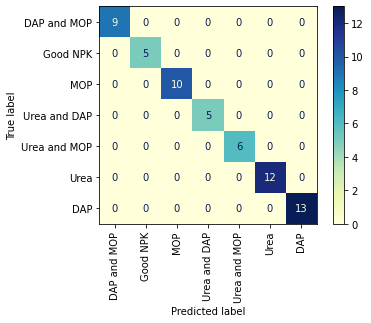

In [75]:
# To visualize confusion matrix
plot_confusion_matrix(model_RF, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [56]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_RF))

#Classification report
print(classification_report(y_test, y_pred_RF))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 
The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 100%. From classification report we found that there were 100% pressision, 100% recall, and 100% f1-score.


Grid search was not performed as the overall accuracy was found as 100%.

#### Classification model: Gradient Boosting

In [57]:
#Gradient Boosting model
model_GB = GradientBoostingClassifier()

# Train the model using the training sets
model_GB = model_GB.fit(X_train, y_train)

In [58]:
#Predict the response for test dataset
y_pred_GB = model_GB.predict(X_test)

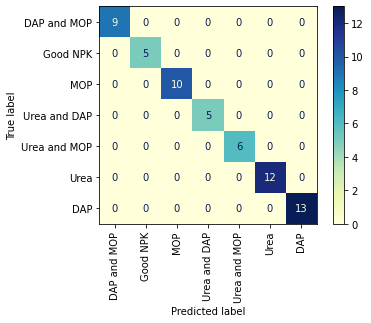

In [76]:
# To visualize confusion matrix
plot_confusion_matrix(model_GB, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [60]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_GB))

#Classification report
print(classification_report(y_test, y_pred_GB))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 
The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 100%. From classification report we found that there were 100% pressision, 100% recall, and 100% f1-score.


Grid search was not performed as the overall accuracy was found as 100%.

## <center>Result

### iv) Performance evaluation of models 

In [61]:
print("Model\t\t\tAccuracy of the model") 
print("""K-Nearest Neighbors\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Decision Tree\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_RF)))
print("""Gradient Boosting\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_GB)))

Model			Accuracy of the model
K-Nearest Neighbors		 0.8833
Decision Tree			 0.9667
Random Forest			 1.0000
Gradient Boosting		 1.0000


**NOTE:** In brief, for our dataset the KNN model has the lowest accuracy of 88% while 100% accuracy was observed in RF and GB. 

#### Checking Prediction Performance


In [62]:
df # Displaying dataset again

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0,1,1
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,4,0,2
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,6,1,3
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,5,0,5
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,3,0,6
...,...,...,...,...,...,...,...,...,...,...
195,23.58,83.59,291.30,5.85,4.0,2.0,3.0,6,1,0
196,25.66,83.47,217.38,7.12,2.0,3.9,2.1,0,1,6
197,24.17,83.73,257.03,5.58,2.0,2.1,3.5,6,1,5
198,26.23,83.84,286.51,5.54,4.2,2.3,3.2,6,1,0


In [63]:
#For K-Nearest Neighbours model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_knn.predict(data)
print(prediction)

[6]


In [64]:
#For Decesion Tree model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = grid_result_DT.predict(data)
print(prediction)

[2]


In [65]:
#For Random Forest model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_RF.predict(data)
print(prediction)

[2]


In [66]:
##For Gradient Boosting model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_GB.predict(data)
print(prediction)

[2]


**NOTE:** Here we used a  sample feature data collected from second row of our dataset to check the prediction performance of the model tested. We found that Decision Tree, Random Forest, and Gradient Boosting have correctly predicted fertilizer class for second row except K-Nearest Neighbors model. 

## Conclusion 

Accuracy of Random Forest and Gradient Boosting are 100% whereas accuracy of K-Nearest Neighbors Classifier and Decision Tree are around 88.33% and 96.67%, respectively. One of the reason of 100% accuracy can be of small data set. So, either Random Forest or Gradient Boosting model can be selected to predict appropriate fertilizer more precisely. As a future work, the method can be extended including diverse varieties of crops with large amount of data.